In [33]:
import pandas as pd
import numpy as np
import mnist 
import seaborn as sns

import matplotlib.pyplot as plt
from keras.models import Sequential #ANN Architecture
from keras.layers import Dense # The layers in the ANN
from keras.utils import to_categorical

In [34]:
train = pd.read_csv("/Users/vishruta/Downloads/train.csv", index_col=False)
test = pd.read_csv("/Users/vishruta/Downloads/test.csv", index_col=False)

In [35]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Checking data for missing values

In [37]:
train.isnull().any().any()

False

In [38]:
test.isnull().any().any()

False

In [39]:
print('Train Shape:', train.shape)
print('Test Shape:', test.shape)

Train Shape: (42000, 785)
Test Shape: (28000, 784)


#### Separating feature and target variables

In [40]:
train_images= train.drop(labels = ["label"],axis = 1)
train_labels= train["label"]

In [41]:
print('Train images:', train_images.shape)
print('Train labels:', train_labels.shape)

Train images: (42000, 784)
Train labels: (42000,)


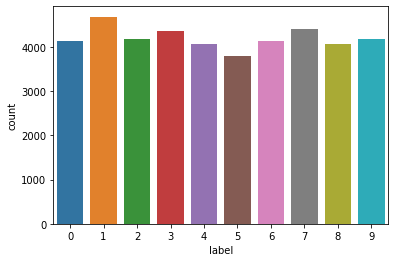

In [42]:
sns.countplot(train_labels)

#### Normalize the data. 
#### Normalize the pixel values from [0, 255] to [0, 1] to make our network easier to train

In [43]:
train_images = train_images/255
train_images.shape

(42000, 784)

#### Splitting the data

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( train_images, train_labels, test_size=0.2, random_state=42)

In [45]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
5457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38509,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39863,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18421,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Artificial Neural Network Model

In [46]:
# Build the model 
# 3 layers, 2 layers with 64 neurons and relu function  and softmax funtion
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [47]:
# Compile the model 
# the loss function measures how well the model did on the training, 
# and then tries to improve on it using the optimizer 
model.compile(
     optimizer ='adam',
       loss = 'categorical_crossentropy', # classes that are greater than 2
        metrics = ['accuracy']
)

In [48]:
# Train the model
model.fit(
    X_train, 
          to_categorical(y_train), # function returns [0,0,1,0,0,0,0,0,0,0,0] for value equal to 2
          epochs = 5 , # number of iterations for the entire data to train
          batch_size = 32 # number of samples per gradient update for training
         ) 

Epoch 1/5
1050/1050 [==============================] - 1s 746us/step - loss: 0.3436 - accuracy: 0.8986
Epoch 2/5
1050/1050 [==============================] - 1s 698us/step - loss: 0.1511 - accuracy: 0.9540
Epoch 3/5
1050/1050 [==============================] - 1s 749us/step - loss: 0.1100 - accuracy: 0.9662
Epoch 4/5
1050/1050 [==============================] - 1s 695us/step - loss: 0.0829 - accuracy: 0.9737
Epoch 5/5
1050/1050 [==============================] - 1s 673us/step - loss: 0.0667 - accuracy: 0.9784


In [49]:
# Evaluate model
model.evaluate(
    X_test,
    to_categorical(y_test),
)

263/263 [==============================] - 0s 537us/step - loss: 0.1124 - accuracy: 0.9662


[0.11236469447612762, 0.9661904573440552]

In [50]:
# Prediction
predict = model.predict(X_test[:5])
# Print model prediction
print('Predicted Labels:' , np.argmax(predict , axis = 1))
print('Actual Labels:' , np.array(y_test[:5]))


Predicted Labels: [8 1 9 9 8]
Actual Labels: [8 1 9 9 8]


In [51]:
X_test=X_test.values

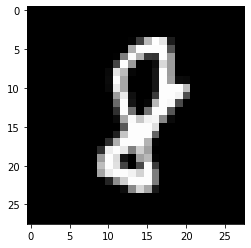

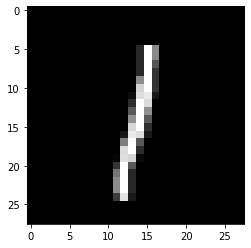

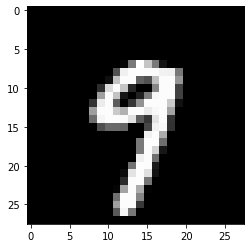

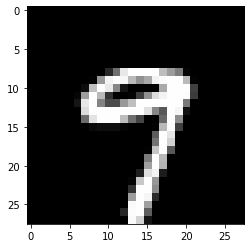

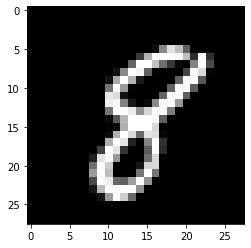

In [52]:
for i in range (0,5):
    first_image = X_test[i]
    first_image = np.array(first_image, dtype = 'float')
    pixels = first_image.reshape((28,28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [53]:
test = test.values

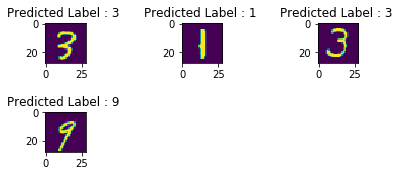

In [54]:
# Making Predictions on Test Data
y_head_test = model.predict(test)
result_test = y_head_test.argmax(axis=1)

#Visualising predictions
for i in range(1,5):
    index = np.random.randint(1,28001)
    plt.subplot(3,3,i)
    plt.imshow(test[index].reshape(28,28))
    plt.title("Predicted Label : {} ".format(result_test[index]))
plt.subplots_adjust(hspace = 1.2, wspace = 1.2)
plt.show()

### KNN Model

In [55]:
import time
from sklearn import metrics

from sklearn.metrics import accuracy_score,precision_score, recall_score, classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors = 1)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

accuracy1 = metrics.accuracy_score(y_test,y_pred1)
#precision1 = metrics.precision_score(y_test,y_pred1)
#recall1 = metrics.recall_score(y_test,y_pred1)

print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test,y_pred1))) 
#print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred1)))
#print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred1)))

Accuracy :0.96869


In [56]:
model2 = KNeighborsClassifier(n_neighbors = 3)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

accuracy2 = metrics.accuracy_score(y_test,y_pred2)
#precision2 = metrics.precision_score(y_test,y_pred2)
#recall2 = metrics.recall_score(y_test,y_pred2)

print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test,y_pred2))) 
#print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred2)))
#print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred2)))

Accuracy :0.96667


In [57]:
model3 = KNeighborsClassifier(n_neighbors = 5)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

accuracy3 = metrics.accuracy_score(y_test,y_pred3)
#precision3 = metrics.precision_score(y_test,y_pred3)
#recall3 = metrics.recall_score(y_test,y_pred3)

print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test,y_pred3))) 
#print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred3)))
#print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred3)))

Accuracy :0.96488


In [58]:
model4 = KNeighborsClassifier(n_neighbors = 10)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

accuracy4 = metrics.accuracy_score(y_test,y_pred4)
#precision4 = metrics.precision_score(y_test,y_pred4)
#recall4 = metrics.recall_score(y_test,y_pred4)

print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test,y_pred4))) 
#print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred4)))
#print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred4)))

Accuracy :0.96167


In [59]:
models = pd.DataFrame({
    'Model': ['KNN (k=1)', 'KNN (k=3)', 'KNN (k=5)', 'KNN (k=10)'],
    'Accuracy': [accuracy1, accuracy2, accuracy3, accuracy4],
   })
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,KNN (k=1),0.968690
1,KNN (k=3),0.966667
2,KNN (k=5),0.964881
3,KNN (k=10),0.961667
